#  Statistical Analysis - Part I
1. <u>Part I</u>
  - Correlation - two variables
  - Correlation - multiple variables
  - Visualizing correlations

2. <u>Part II</u>
  - Linear and multi-linear regression
  - Logistic regression
  - Polynomial regression

## Correlation - two variables
Helps identify if a linear relationship exists between two variables

Different types of correlation - Pearson's and Spearman (rank)

 - **Pearson's** - measures the strength and direction of a linear relationship between two variables
 - **Spearman** - measures the strength and direction of a monotonic relationship between two variables

Both of these measures of correlation are on a scale of -1 to 1.

Consider the two arrays, A and B: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns

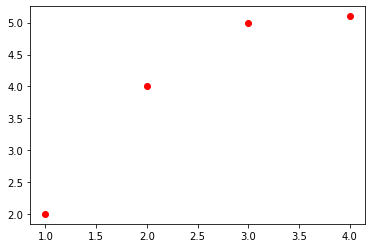

In [ ]:
A = np.array([1, 2, 3, 4])
B = np.array([2, 4, 5, 5.1])
plt.scatter(A,B, c='red')

Based on the above plot, what values would you guess for the Pearson's and Spearman correlation estimates?

We can use the corr function, which outputs the pairwise correlation between the columns of the two matrices. With the corr function, we have the option to specify Pearson or Spearman correlation by using the 'type' option. Note that we have to transpose the arrays in order to arrange the data into columns.

In [ ]:
df = pd.DataFrame(np.array([A, B]).T)
r = df.corr()[0][1]
r

0.9244083564662487

In [ ]:
# r_spear, _ = stats.spearmanr(A,B)
# r_spear

df = pd.DataFrame(np.array([A, B]).T)
r_spear = df.corr(method="spearman")[0][1]
r_spear

1.0

As expected, the Pearson correlation value is fairly high as the two variables appear to have a strong linear relationship.

The output of 1 for the Spearman correlation also makes sense because the two arrays are completely monotonic, meaning that as one variable increases, so does the other. 

Once we have r, we can easily calculate the **coefficient of determination**, $r^2$. The coefficient of determination measures the proportion of variance in the dependent variable that can be explained by the independent variable. 

In [ ]:
r_squared = r**2
r_squared

0.8545308095046312

## Correlation - Multiple Variables

We can also examine the correlation between more than two variables. Load the Framingham data set for use in the following examples.


Download the dataset

In [ ]:
!gdown --id 1OnIYNtdVIVIgrxdDkL3L0chpG8DpWTjz


Downloading...
From: https://drive.google.com/uc?id=1OnIYNtdVIVIgrxdDkL3L0chpG8DpWTjz
To: /content/fram.txt
100% 1.46M/1.46M [00:00<00:00, 92.0MB/s]


Load the dataset

In [ ]:
fram = pd.read_csv("fram.txt", delimiter=",")

Use the corr function to find the correlation between systolic and diastolic blood pressure. Note that the default correlation type for corr is "Pearson".

In [ ]:
pd.concat([fram.SYSBP, fram.DIABP], axis=1).corr()["SYSBP"]["DIABP"]

0.7116413424686253

When the corr function is used on more than two variables, the output is a matrix of the correlation coefficients. Find the correlation between systolic blood pressure, diastolic blood pressure, and age.

In [ ]:
pd.concat([fram.SYSBP, fram.DIABP, fram.AGE], axis=1).corr()

,SYSBP,DIABP,AGE
SYSBP,1.000000,0.711641,0.389010
DIABP,0.711641,1.000000,0.069258
AGE,0.389010,0.069258,1.000000


Each value in the matrix corresponds to the correlation between the variables in that particular row and column. For example, the correlation between diastolic blood pressure and age is 0.0693.

This same process can be used for any number of variables. We will now analyze the variables in columns 2 through 11 of the Framingham data set. First, extract these columns from the full data set.

In [ ]:
fram_2_11 = fram.iloc[:, 1:11]

What variables are included in these ten columns?


In [ ]:
var_names = fram_2_11.columns;
var_names

Index(['SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'BMI',
       'DIABETES', 'BPMEDS'],
      dtype='object')

In order for the corrcoef function to work correctly, we need to remove the observations containing NaN. One option is to create a new matrix with the rmmissing function, which removes all rows with missing data:

In [ ]:
fram_noNaN = fram_2_11.dropna()
r = fram_noNaN.corr()
r

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS
SEX,1.000000,0.130942,0.026682,0.043813,-0.052579,-0.156172,-0.251377,-0.073981,-0.023242,0.083845
TOTCHOL,0.130942,1.000000,0.165474,0.158044,0.135976,-0.048329,-0.037160,0.084295,0.006010,0.061169
AGE,0.026682,0.165474,1.000000,0.383158,0.057624,-0.252207,-0.225271,0.061241,0.132274,0.200208
SYSBP,0.043813,0.158044,0.383158,1.000000,0.710787,-0.143799,-0.101146,0.270724,0.136221,0.328716
DIABP,-0.052579,0.135976,0.057624,0.710787,1.000000,-0.075012,-0.029760,0.334008,0.022860,0.226704
CURSMOKE,-0.156172,-0.048329,-0.252207,-0.143799,-0.075012,1.000000,0.780593,-0.164829,-0.042898,-0.089560
CIGPDAY,-0.251377,-0.037160,-0.225271,-0.101146,-0.029760,0.780593,1.000000,-0.099622,-0.045063,-0.084540
BMI,-0.073981,0.084295,0.061241,0.270724,0.334008,-0.164829,-0.099622,1.000000,0.088941,0.098358
DIABETES,-0.023242,0.006010,0.132274,0.136221,0.022860,-0.042898,-0.045063,0.088941,1.000000,0.077035
BPMEDS,0.083845,0.061169,0.200208,0.328716,0.226704,-0.089560,-0.084540,0.098358,0.077035,1.000000


Now use the sort_values function to find the five highest correlation features (positive or negative) for each variable as well as the index. We will specify for the function to return the five largest values for each column, the indices of these vaues, and to use absolute values to find the maximums.  

In [ ]:
def maxk(df, k, method=None):
  series = []
  series_indices = []
  for col in df:
    if method is None:
      sorted_index = df[col].sort_values(ascending=False)[:k]
    elif method=="abs":
      sorted_index = df[col].sort_values(ascending=False, key=lambda x: abs(x))[:k]
    series_indices.append(sorted_index.index.to_series().rename(col).dropna().reset_index()[col])
    series.append(sorted_index.reset_index()[col])
  return series, series_indices


,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,-0.251377,0.165474,0.383158,0.710787,0.710787,0.780593,0.780593,0.334008,0.136221,0.328716
2,-0.156172,0.158044,-0.252207,0.383158,0.334008,-0.252207,-0.251377,0.270724,0.132274,0.226704
3,0.130942,0.135976,-0.225271,0.328716,0.226704,-0.164829,-0.225271,-0.164829,0.088941,0.200208
4,0.083845,0.130942,0.200208,0.270724,0.135976,-0.156172,-0.101146,-0.099622,0.077035,0.098358


In [ ]:
series, series_indices = maxk(r, 5, "abs")
pd.concat(series, axis=1)

We can make the top ranking features easier to interpret by creating tables with the variable names, as opposed to the indices.

In [ ]:
pd.concat(series_indices, axis=1)

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS
0,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS
1,CIGPDAY,AGE,SYSBP,DIABP,SYSBP,CIGPDAY,CURSMOKE,DIABP,SYSBP,SYSBP
2,CURSMOKE,SYSBP,CURSMOKE,AGE,BMI,AGE,SEX,SYSBP,AGE,DIABP
3,TOTCHOL,DIABP,CIGPDAY,BPMEDS,BPMEDS,BMI,AGE,CURSMOKE,BMI,AGE
4,BPMEDS,SEX,BPMEDS,BMI,TOTCHOL,SEX,SYSBP,CIGPDAY,BPMEDS,BMI


Looking at these two tables, what are some of the variables with the highest correlation? Aside from the 1's in the correlation coefficient matrix (which refer to the variable's correlation with itself), what are the three highest values and what features do they correspond to?
 - Correlation = 0.7806 - CIGPDAY, CURSMOKE
 - Correlation = 0.7108 - SYSBP, DIABP
 - Correlation = 0.3832 - SYSBP, AGE

Does it makes sense that these variables have strong linear relationships? Are there any other variables that you would expect to have high correlation coefficients?

Repeat the same process on columns 2-11 of the Framingham data set, but this time using rank correlation. 



In [ ]:
r_rank = fram_noNaN.corr("spearman");
max_corr_rank, I_rank = maxk(r_rank,5,"abs");
pd.concat(max_corr_rank, axis=1)

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,-0.214941,0.183318,0.391409,0.708353,0.708353,0.950907,0.950907,0.323496,0.130912,0.295770
2,-0.156172,0.172111,-0.255121,0.391409,0.323496,-0.252048,-0.255121,0.266552,0.120703,0.212632
3,-0.134998,0.147082,-0.252048,0.295770,0.212632,-0.171030,-0.214941,-0.171030,0.077035,0.198149
4,0.126983,0.126983,0.198149,0.266552,0.147082,-0.156172,-0.148281,-0.148281,0.072804,-0.092541


In [ ]:
pd.concat(I_rank, axis=1)

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS
0,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS
1,CIGPDAY,AGE,SYSBP,DIABP,SYSBP,CIGPDAY,CURSMOKE,DIABP,AGE,SYSBP
2,CURSMOKE,SYSBP,CIGPDAY,AGE,BMI,AGE,AGE,SYSBP,SYSBP,DIABP
3,BMI,DIABP,CURSMOKE,BPMEDS,BPMEDS,BMI,SEX,CURSMOKE,BPMEDS,AGE
4,TOTCHOL,SEX,BPMEDS,BMI,TOTCHOL,SEX,BMI,CIGPDAY,BMI,CIGPDAY


Do the same features have the strongest correlation coefficients?
- Correlation = 0.9509 - CIGPDAY, CURSMOKE
- Correlation = 0.7084 - SYSBP, DIABP
- Correlation = 0.3914 - SYSBP, AGE

While the correlation coefficients are different from the Spearman's rank test, the variables with the strongest linear relationships are the same. 


### Visualizing Correlations
Heatmaps use color-coding to compare data, making it easy to observe variable relationships and patterns. Heatmaps are a useful tool for visualizing pairwise correlations. The heatmap function in python accepts both tables and matrices as inputs. 

Create a heatmap for the pairwise correllations of our ten variables.

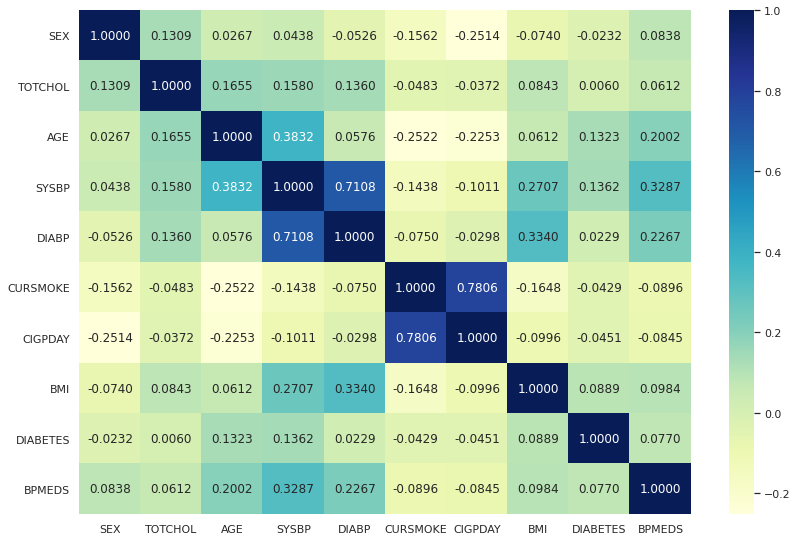

In [ ]:
sns.set(rc={'figure.figsize':(13.7,9.27)})
ax = sns.heatmap(r, annot=True, fmt=".4f",  cmap="YlGnBu")

The heatmap makes it very easy to pick out the highest and lowest correlated features.  


Another tool in Python for visualizing raw data correlations is pandas.plotting.scatter_matrix. This command creates a matrix of scatter plots for each variable in the data set against every other variable. 

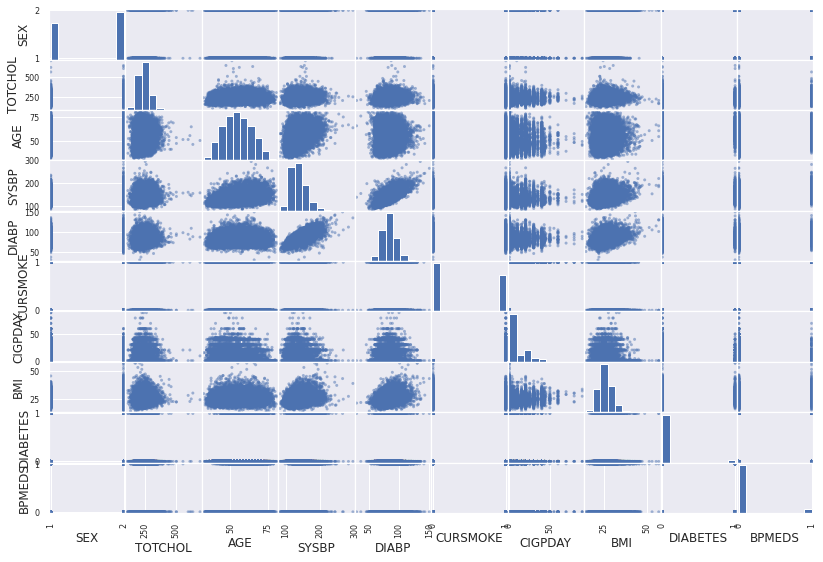

In [ ]:
pd.plotting.scatter_matrix(fram_2_11)
plt.show()